# Lung Cancer Image Classification (CNN)

### 1. Installation des librairies nécessaires

In [1]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


###  2. Imports

In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm import tqdm

### 3. Préparation du dataset

In [9]:
base_dir = "lung_colon_image_set"
train_val_dir = os.path.join(base_dir, "Train and Validation Set")
test_dir = os.path.join(base_dir, "Test Set")

# Paramètres
img_height, img_width = 224, 224
batch_size = 32
val_split = 0.2  # 20% validation

####  Data Augmentation

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=val_split
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Chargement du train et validation
train_ds = train_datagen.flow_from_directory(
    train_val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_ds = train_datagen.flow_from_directory(
    train_val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Chargement du test
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Vérification des classes
print("\nClasses trouvées :", train_ds.class_indices)

Found 18001 images belonging to 5 classes.
Found 4500 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.

Classes trouvées : {'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}


###  4. Définition du modèle CNN

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  #  5 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\hp\Desktop\ProjetAIMedical\Projet1\P1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,162,917 (73.10 MB)

 Trainable params: 19,162,917 (73.10 MB)

 Non-trainable params: 0 (0.00 B)

### 5. Entraînement du modèle

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss')

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

c:\Users\hp\Desktop\ProjetAIMedical\Projet1\P1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5016 - loss: 1.1130

563/563 ━━━━━━━━━━━━━━━━━━━━ 2269s 4s/step - accuracy: 0.6345 - loss: 0.7843 - val_accuracy: 0.8033 - val_loss: 0.4913 - learning_rate: 0.0010
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2463s 4s/step - accuracy: 0.7793 - loss: 0.5036 - val_accuracy: 0.7393 - val_loss: 0.5505 - learning_rate: 0.0010
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.8360 - loss: 0.4000 

563/563 ━━━━━━━━━━━━━━━━━━━━ 15831s 28s/step - accuracy: 0.8499 - loss: 0.3742 - val_accuracy: 0.8353 - val_loss: 0.3889 - learning_rate: 0.0010
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8754 - loss: 0.3202 

563/563 ━━━━━━━━━━━━━━━━━━━━ 8739s 16s/step - accuracy: 0.8787 - loss: 0.3112 - val_accuracy: 0.8856 - val_loss: 0.2797 - learning_rate: 0.0010
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2895s 5s/step - accuracy: 0.9068 - loss: 0.2475 - val_accuracy: 0.8104 - val_loss: 0.4798 - learning_rate: 0.0010
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2247s 4s/step - accuracy: 0.9110 - loss: 0.2320 - val_accuracy: 0.7900 - val_loss: 0.5465 - learning_rate: 0.0010
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9269 - loss: 0.1977

563/563 ━━━━━━━━━━━━━━━━━━━━ 2259s 4s/step - accuracy: 0.9240 - loss: 0.2027 - val_accuracy: 0.9264 - val_loss: 0.1931 - learning_rate: 0.0010
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9292 - loss: 0.1870

563/563 ━━━━━━━━━━━━━━━━━━━━ 2275s 4s/step - accuracy: 0.9326 - loss: 0.1784 - val_accuracy: 0.9387 - val_loss: 0.1473 - learning_rate: 0.0010
Epoch 9/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9374 - loss: 0.1713

563/563 ━━━━━━━━━━━━━━━━━━━━ 2275s 4s/step - accuracy: 0.9392 - loss: 0.1658 - val_accuracy: 0.9562 - val_loss: 0.1157 - learning_rate: 0.0010
Epoch 10/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2512s 4s/step - accuracy: 0.9443 - loss: 0.1505 - val_accuracy: 0.9320 - val_loss: 0.1902 - learning_rate: 0.0010


### 6. Visualisation des courbes d'apprentissage

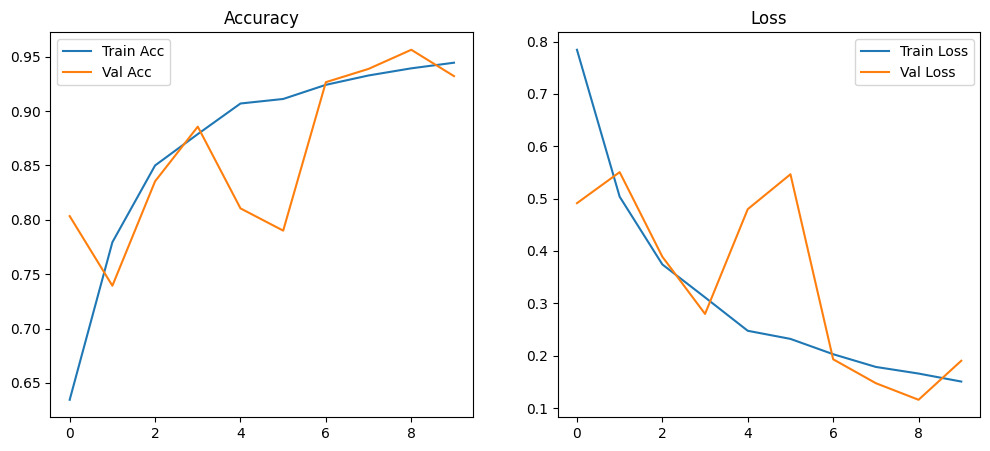

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

### 7. Évaluation sur le jeu de test

In [14]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

2499/2499 ━━━━━━━━━━━━━━━━━━━━ 256s 102ms/step - accuracy: 0.9600 - loss: 0.1052
✅ Test Accuracy: 0.9600 | Test Loss: 0.1052


### 8. Métriques avancées : Precision, Recall, F1, ROC-AUC, Log Loss

2499/2499 ━━━━━━━━━━━━━━━━━━━━ 258s 102ms/step

📋 Classification Report:
              precision    recall  f1-score   support

   colon_aca       1.00      0.98      0.99       500
     colon_n       0.97      1.00      0.99       500
    lung_aca       0.90      0.93      0.91       500
      lung_n       0.99      1.00      1.00       500
    lung_scc       0.94      0.89      0.92       499

    accuracy                           0.96      2499
   macro avg       0.96      0.96      0.96      2499
weighted avg       0.96      0.96      0.96      2499



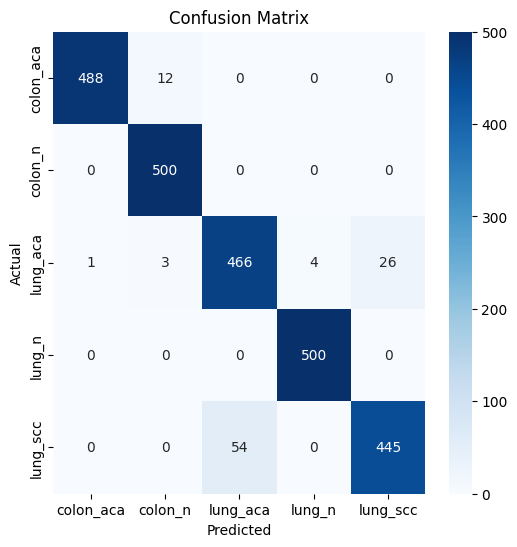

ROC-AUC Score: 0.9976
Log Loss: 0.1052


In [15]:
y_true = test_ds.classes
y_pred_prob = model.predict(test_ds)
y_pred = np.argmax(y_pred_prob, axis=1)
target_names = list(test_ds.class_indices.keys())

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC
try:
    roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.4f}")
except:
    print("ROC-AUC calculation skipped (check data format).")

# Log Loss
logloss = log_loss(y_true, y_pred_prob)
print(f"Log Loss: {logloss:.4f}")

###  9. Affichage des images avec labels réels et prédits

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


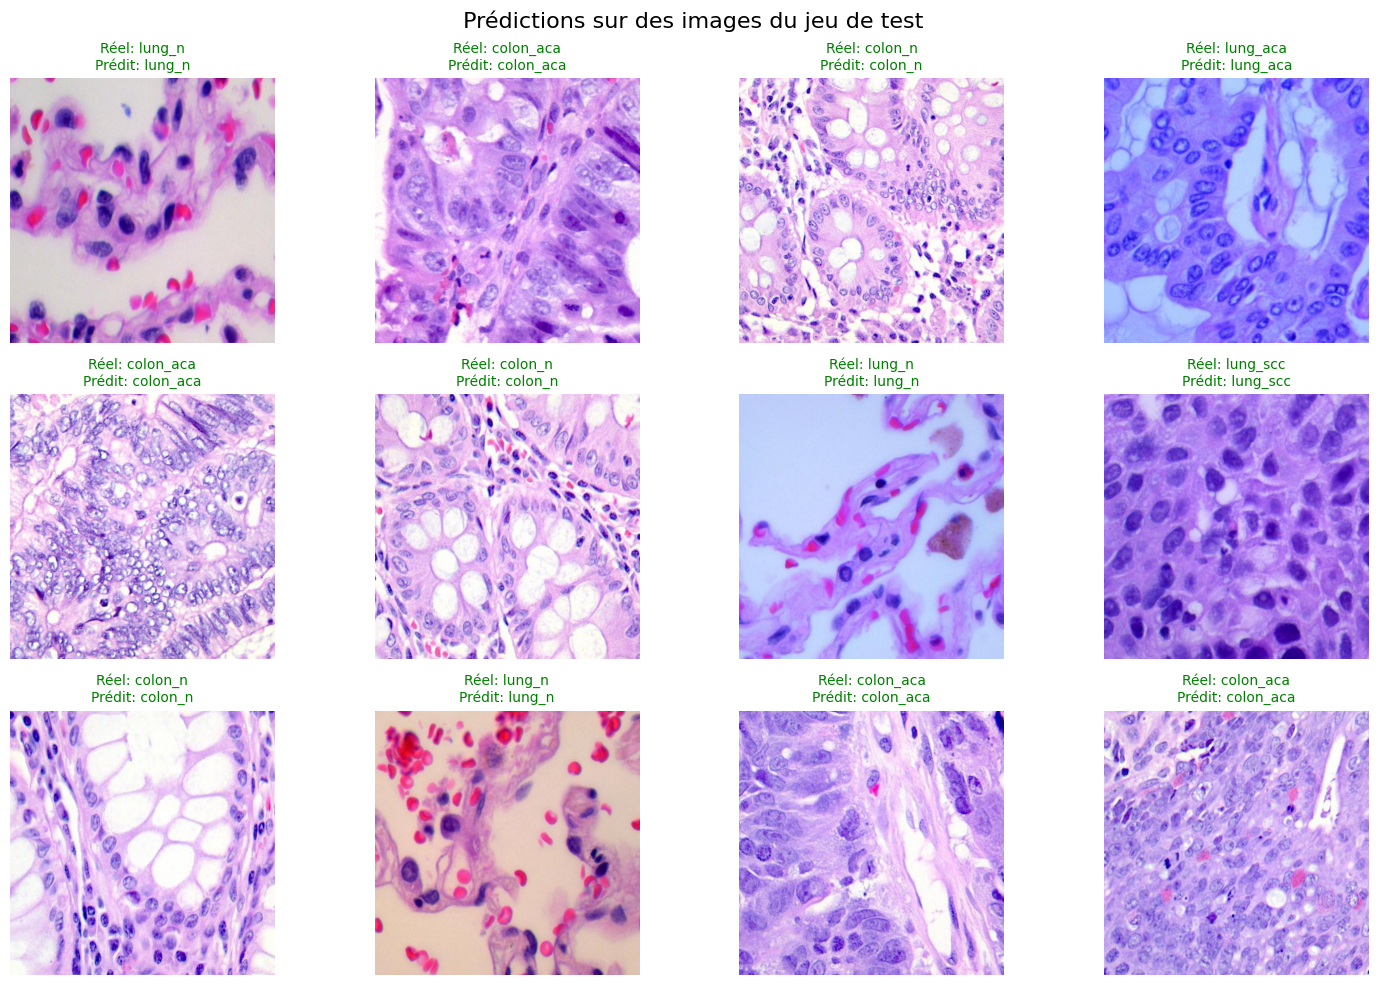

In [16]:
# ============================================================

# ============================================================
import random
import cv2

# Sélectionner un échantillon aléatoire d'images du test set
num_images = 12  # Nombre d’images à afficher
indices = random.sample(range(len(test_ds.filenames)), num_images)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    # Charger l'image et la normaliser
    img_path = os.path.join(test_dir, test_ds.filenames[idx])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_height, img_width))
    
    # Prédiction
    img_array = np.expand_dims(img_resized / 255.0, axis=0)
    pred = model.predict(img_array)
    pred_label = target_names[np.argmax(pred)]
    true_label = target_names[y_true[idx]]

    # Affichage
    plt.subplot(3, 4, i + 1)
    plt.imshow(img_rgb)
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Réel: {true_label}\nPrédit: {pred_label}", color=color, fontsize=10)
    plt.axis("off")

plt.suptitle(" Prédictions sur des images du jeu de test", fontsize=16)
plt.tight_layout()
plt.show()
